# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

In [26]:
# Code Here
!pip install palmerpenguins
from palmerpenguins import load_penguins

penguins = load_penguins()
penguins.head()

penguins = penguins.dropna()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


In [5]:
import pandas as pd
from palmerpenguins import load_penguins
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error


from plotnine import ggplot, aes, geom_point, geom_line, geom_smooth

In [22]:
penguins = penguins.dropna()
X = penguins.drop('bill_depth_mm', axis = 1) #this model uses all variables to predict bill depth
y = penguins['bill_depth_mm']
X_train, X_test, y_train, y_test = train_test_split(X,y)


lr = LinearRegression()
enc = OneHotEncoder()

# using column transformer to dummify variables
ct = ColumnTransformer(
    [('dummify_s', enc, ['species']),
    ('dummify_i', enc, ['island']),
    ('dummify_se', enc, ['sex'])]
)

# a pipeline that the data will go through, first column transformer, then linear regression
my_pipeline = Pipeline(
    [('dummify_everything', ct), ('ols', lr)]

)


fitted_pipeline1 = my_pipeline.fit(X_train, y_train)
predict1 = fitted_pipeline1.predict(X_test)

X_test['predict'] = predict1
X_test1 = X_test

MSE1 = mean_squared_error(y_test, predict1) #MSE between predicted values of the model and y_test data

print(MSE1)

predict11 = fitted_pipeline1.predict(X_train)

X_train['predict'] = predict11
X_train1 = X_train

MSE11 = mean_squared_error(y_train, predict11)  #MSE between predicted values and y_train data to see fitting

print(MSE11)

0.9343927129109699
0.6012292639797471


In [23]:
penguins = penguins.dropna()
X = penguins.drop('bill_depth_mm', axis = 1)
X = X.drop('species', axis = 1) #this model has all predictors besides species
y = penguins['bill_depth_mm']

X_train, X_test, y_train, y_test = train_test_split(X,y)

lr = LinearRegression()
enc = OneHotEncoder()

ct = ColumnTransformer(
    [('dummify_i', enc, ['island']),
    ('dummify_se', enc, ['sex'])]
)

my_pipeline = Pipeline(
    [('dummify_everything', ct), ('ols', lr)]

)


fitted_pipeline2 = my_pipeline.fit(X_train, y_train)
predict2 = fitted_pipeline2.predict(X_test)

X_test['predict'] = predict2
X_test2 = X_test

MSE2 = mean_squared_error(y_test, predict2)

print(MSE2)

predict21 = fitted_pipeline2.predict(X_train)

X_train['predict'] = predict21
X_train2 = X_train

MSE21 = mean_squared_error(y_train, predict21)

print(MSE21)

1.5970758928571427
1.8856180973895582


In [25]:
penguins = penguins.dropna()
X = penguins.drop('bill_depth_mm', axis = 1)
X = X.drop('species', axis = 1) #this model has all predictors besides species and island
X = X.drop('island', axis = 1)
y = penguins['bill_depth_mm']

X_train, X_test, y_train, y_test = train_test_split(X,y)

lr = LinearRegression()
enc = OneHotEncoder()

ct = ColumnTransformer(
    [('dummify_se', enc, ['sex'])]
)

my_pipeline = Pipeline(
    [('dummify_everything', ct), ('ols', lr)]

)


fitted_pipeline3 = my_pipeline.fit(X_train, y_train)
predict3 = fitted_pipeline3.predict(X_test)

X_test['predict'] = predict3
X_test3 = X_test

MSE3 = mean_squared_error(y_test, predict3)

print(MSE3)

predict31 = fitted_pipeline3.predict(X_train)

X_train['predict'] = predict31
X_train3 = X_train

MSE31 = mean_squared_error(y_train, predict31)

print(MSE31)

3.8165936278188033
3.171096875496796


In [29]:
penguins = penguins.dropna()
X = penguins.drop('bill_depth_mm', axis = 1)
X = X.drop('species', axis = 1) #this model drops species, island, and sex, but uses all other predictors
X = X.drop('island', axis = 1)
X = X.drop('sex', axis = 1)
y = penguins['bill_depth_mm']

X_train, X_test, y_train, y_test = train_test_split(X,y)


lr = LinearRegression()
enc = OneHotEncoder()

#do not need to dummify variables, so no need for column transformer
my_pipeline = Pipeline(
    [('ols', lr)]

)


fitted_pipeline4 = my_pipeline.fit(X_train, y_train)
predict4 = fitted_pipeline4.predict(X_test)

X_test['predict'] = predict4
X_test4 = X_test

MSE4 = mean_squared_error(y_test, predict4)

print(MSE4)

predict41 = fitted_pipeline4.predict(X_train)

X_train['predict'] = predict41
X_train4 = X_train

MSE41 = mean_squared_error(y_train, predict41)

print(MSE41)

2.1332124791110636
2.4861940020823226


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


It seems like the first model with all variables included was the best since it has the lowest MSE.

Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on a training dataset subset of the entire dataset:

* Four different models, each containing a different set of predictor variables

Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

In [38]:
# Code Here
data = { 'MSE': [MSE4, MSE3, MSE2, MSE1], 'VAR': [4, 6, 9, 12], 'MSE2': [MSE41,MSE31,MSE21,MSE11]}
# we denote VAR as 4, 6, 9, and 12 since we are dummifying species, island, and sex when they are in a given model
# the model where VAR is 12, for example, we have the four non-dummified vars (bill length, flipper length, body mass, and year) and then 2 vars for sex, 3 vars for species, and 3 vars for island, totaling 12
df = pd.DataFrame(data)

print(df)

        MSE  VAR      MSE2
0  2.133212    4  2.486194
1  3.816594    6  3.171097
2  1.597076    9  1.885618
3  0.934393   12  0.601229


/usr/local/lib/python3.10/dist-packages/plotnine/stats/smoothers.py:347: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
/usr/local/lib/python3.10/dist-packages/plotnine/stats/smoothers.py:347: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


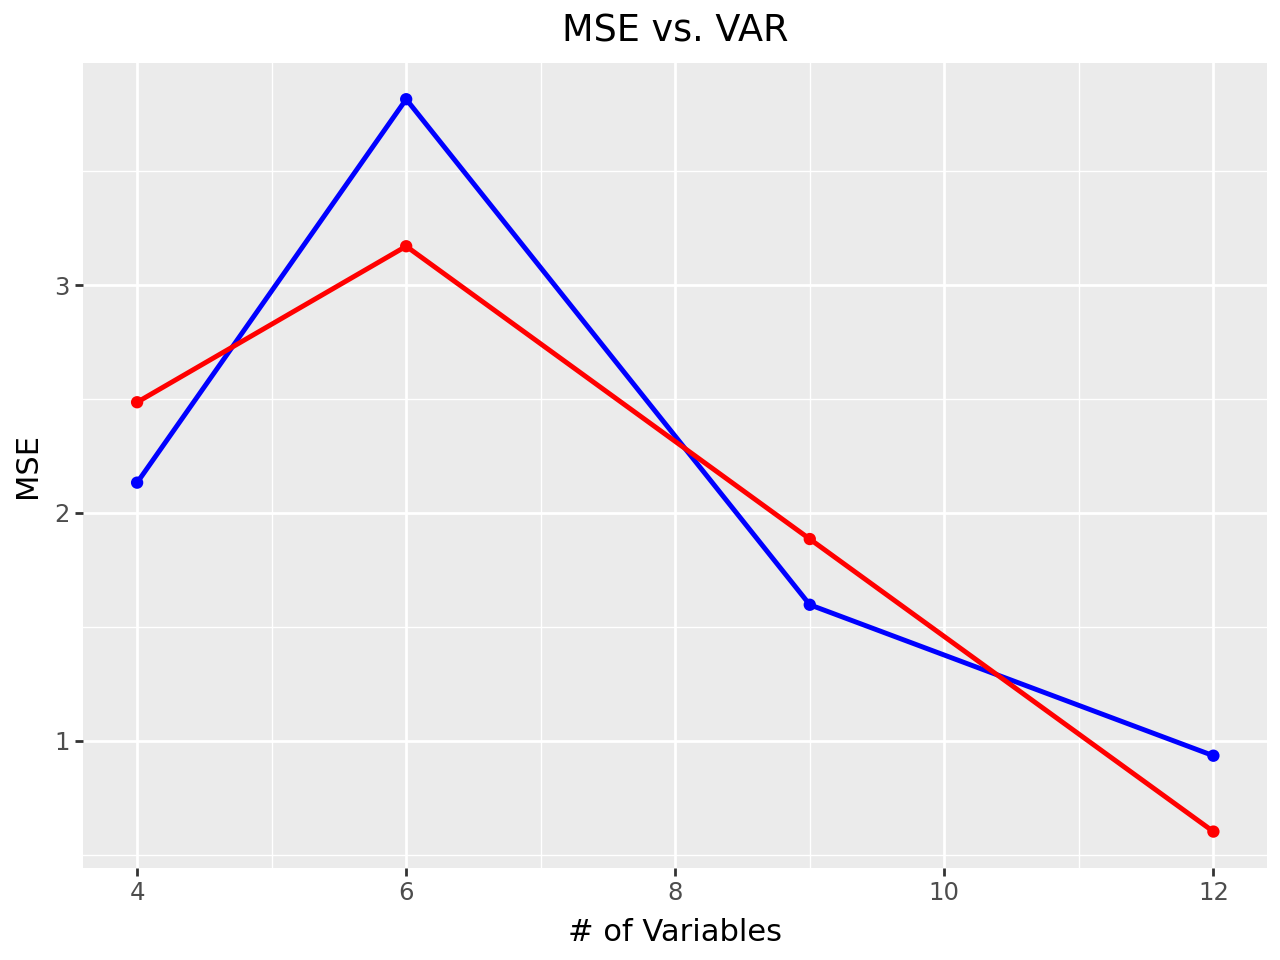

In [41]:
from plotnine import ggplot, aes, geom_point, geom_smooth, labs, guides, guide_legend

(ggplot(df)
    + geom_point(aes(y='MSE', x='VAR'), color = 'blue')
    + geom_smooth(aes(y='MSE', x='VAR'), color = 'blue')
    + geom_point(aes(y='MSE2', x='VAR'), color = 'red')
    + geom_smooth(aes(y='MSE2', x='VAR'), color = 'red')
    + labs(title="MSE vs. VAR", x="# of Variables", y="MSE")
    + guides(color=guide_legend(title="MSE Type"))
)